In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
#data from may 1996 to july 2014
header_name = ["userId","productId", "rating", "timestamp"]
electronic_rate = pd.read_csv('C:\\Users\\user\\Documents\\IOD\\Project 1 data\\ratings_Electronics.csv', header=None,names=header_name)
electronic_rate.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
electronic_rate.shape

(7824482, 4)

In [25]:
electronic_rate.size

23473446

In [4]:
electronic_rate.dtypes

userId        object
productId     object
rating       float64
timestamp      int64
dtype: object

In [5]:
#drop timestamp as it is not require in this analysis 
electronic_rate.drop(['timestamp'], axis=1, inplace=True)
electronic_rate.head()

,userId,productId,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [6]:
#check null value 
electronic_rate.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [7]:
#check whether there is duplicated entry of user with the same product 
electronic_rate.duplicated().sum()

0

In [8]:
#check the data statistic 
electronic_rate.describe()

,rating
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [9]:
#electronic_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [10]:
#the number of unique userId, productId and rating
electronic_rate.nunique()

userId       4201696
productId     476002
rating             5
dtype: int64

In [15]:
#i want to check the no. rating  
electronic_rate.value_counts(['rating'], sort=False)


rating
1.0        901765
2.0        456322
3.0        633073
4.0       1485781
5.0       4347541
dtype: int64

In [64]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `

Text(0, 0.5, 'Number of user')

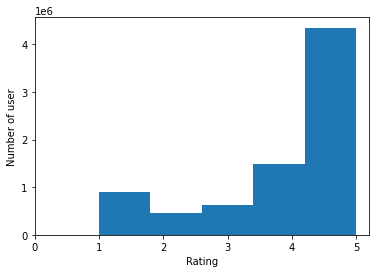

In [16]:
# need to check this 
plt.hist(electronic_rate['rating'], bins=5)
plt.xlabel('Rating')
plt.xticks(np.arange(6), ('0','1', '2', '3', '4', '5'))
plt.ylabel('Number of user')

In [58]:
#product that got the most number of rating by user ..  electronic_rate.groupby('productId').size().sort_values(ascending=False)[:20]
most_rated_products = electronic_rate.value_counts('productId')[:10]
print(most_rated_products)

productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
B003ELYQGG    11617
B003ES5ZUU    10276
B007R5YDYA     9907
B00622AG6S     9823
B0002L5R78     9487
dtype: int64


In [61]:
#user that rate the most products . count_rated_user = electronic_rate.groupby('userId').size().sort_values(ascending=False)
most_rated_users = electronic_rate.value_counts('userId')[:10]
print(most_rated_users)

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
dtype: int64


In [62]:
#i want to get user who have rated 10 products or more to be included in the analysis 
tenormore_rated_user = electronic_rate.userId.isin(most_rated_users >= 500)
print(len(tenormore_rated_user))
 

7824482


In [60]:
#count_rated_user = electronic_rate.groupby('userId').size()
#electronic_rate('userId').isin[count_rated_user[count_rated_user >= 10].index]
#print(len(ten_or_more_rated_user))

7824482
